<a href="https://colab.research.google.com/github/VIGIL1992/Stock_Price_Prediction_LSTM/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
#import pandas_datareader as pdr
import yfinance as yf
import pandas as pd


In [ ]:
tata_motors_nse = yf.Ticker("TATAMOTORS.BO")

In [ ]:
#tata_motors_nse.to_csv('tata_motors_nse.csv')

In [ ]:
df = tata_motors_nse.history(period="max")


In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00+05:30,16.114733,16.114733,16.114733,16.114733,0,0.0,0.0
2000-01-04 00:00:00+05:30,16.114733,16.114733,16.114733,16.114733,0,0.0,0.0
2000-01-05 00:00:00+05:30,16.114733,16.114733,16.114733,16.114733,0,0.0,0.0
2000-01-06 00:00:00+05:30,16.114733,16.114733,16.114733,16.114733,0,0.0,0.0
2000-01-07 00:00:00+05:30,16.114733,16.114733,16.114733,16.114733,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-11 00:00:00+05:30,632.250000,637.650024,632.250000,633.849976,553727,0.0,0.0
2023-10-12 00:00:00+05:30,636.900024,640.450012,635.099976,636.849976,196495,0.0,0.0
2023-10-13 00:00:00+05:30,634.950012,669.099976,633.049988,667.150024,970594,0.0,0.0


In [ ]:
df1 = df.reset_index()['Close']

In [ ]:
df1.shape

(5916,)

In [ ]:
df1

0        16.114733
1        16.114733
2        16.114733
3        16.114733
4        16.114733
           ...    
5911    633.849976
5912    636.849976
5913    667.150024
5914    666.099976
5915    655.750000
Name: Close, Length: 5916, dtype: float64

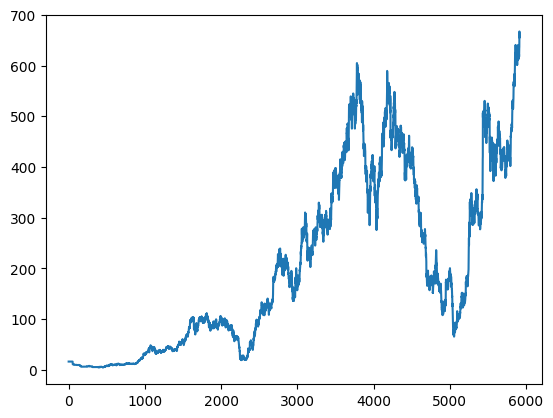

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.01758112],
       [0.01758112],
       [0.01758112],
       ...,
       [1.        ],
       [0.99841547],
       [0.98279725]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(3845, 2071)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.01758112 0.01758112 0.01758112 ... 0.00779831 0.00779831 0.00779831]
 [0.01758112 0.01758112 0.01758112 ... 0.00779831 0.00779831 0.00779831]
 [0.01758112 0.01758112 0.01758112 ... 0.00779831 0.00779831 0.00779831]
 ...
 [0.77544346 0.7971645  0.80199132 ... 0.78260841 0.76496015 0.77054121]
 [0.7971645  0.80199132 0.79120628 ... 0.76496015 0.77054121 0.77355803]
 [0.80199132 0.79120628 0.79045205 ... 0.77054121 0.77355803 0.79248835]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(3744, 100)
(3744,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1970, 100)
(1970,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
print(X_train.shape), print(y_train.shape)

(3744, 100, 1)
(3744,)


(None, None)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
59/59 [==============================] - 20s 230ms/step - loss: 0.0078 - val_loss: 0.0019
Epoch 2/100
59/59 [==============================] - 15s 255ms/step - loss: 3.3632e-04 - val_loss: 0.0016
Epoch 3/100
59/59 [==============================] - 14s 231ms/step - loss: 2.7898e-04 - val_loss: 0.0015
Epoch 4/100
59/59 [==============================] - 17s 282ms/step - loss: 3.3624e-04 - val_loss: 0.0014
Epoch 5/100
59/59 [==============================] - 14s 241ms/step - loss: 2.5647e-04 - val_loss: 0.0013
Epoch 6/100
59/59 [==============================] - 15s 252ms/step - loss: 2.6747e-04 - val_loss: 0.0015
Epoch 7/100
59/59 [==============================] - 15s 258ms/step - loss: 2.6407e-04 - val_loss: 0.0013
Epoch 8/100
59/59 [==============================] - 13s 209ms/step - loss: 2.4257e-04 - val_loss: 0.0012
Epoch 9/100
59/59 [==============================] - 19s 325ms/step - loss: 2.2864e-04 - val_loss: 0.0010
Epoch 10/100
59/59 [==============================

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__

'2.13.0'

In [ ]:
# prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

62/62 [==============================] - 3s 34ms/step


In [ ]:
#Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

191.23968456804704

In [ ]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

369.27390618462255

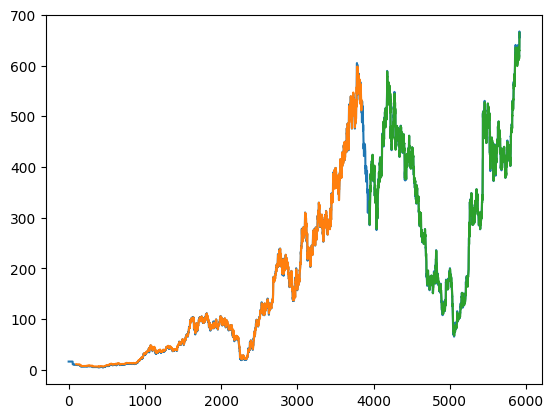

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

2071

In [ ]:
x_input=test_data[1971:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.7187204677820999,
 0.7133635001050603,
 0.7480707339766651,
 0.7531258811995042,
 0.7620290780337236,
 0.7653488727732495,
 0.7713849594979078,
 0.7942464082865142,
 0.7795335591452904,
 0.7712340032194719,
 0.785116915188648,
 0.781495253943586,
 0.7907757033198879,
 0.7782509373432779,
 0.7699513814174593,
 0.7757610337244638,
 0.7761382862665465,
 0.7876822508953444,
 0.8009615219561198,
 0.8017160270402851,
 0.8178624542619573,
 0.8317453662311334,
 0.850306172881066,
 0.837781406904456,
 0.8416293644131648,
 0.8438928796656608,
 0.841025723504764,
 0.8536260136719277,
 0.850758857511031,
 0.8527205523093265,
 0.8469863320902044,
 0.8734694421238728,
 0.870300557611447,
 0.8523432997672439,
 0.8371777659960552,
 0.8501552166026302,
 0.8580020878984838,
 0.8786001135372655,
 0.891879384598041,
 0.9265111863817634,
 0.9265111863817634,
 0.9360179320217121,
 0.9263602301033275,
 0.9295292067184246,
 0.9311890810625199,
 0.937602374277925,
 0.9428084777792001,
 0.9599357063486843,
 

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.97218347]
101
1 day input [0.7133635  0.74807073 0.75312588 0.76202908 0.76534887 0.77138496
 0.79424641 0.77953356 0.771234   0.78511692 0.78149525 0.7907757
 0.77825094 0.76995138 0.77576103 0.77613829 0.78768225 0.80096152
 0.80171603 0.81786245 0.83174537 0.85030617 0.83778141 0.84162936
 0.84389288 0.84102572 0.85362601 0.85075886 0.85272055 0.84698633
 0.87346944 0.87030056 0.8523433  0.83717777 0.85015522 0.85800209
 0.87860011 0.89187938 0.92651119 0.92651119 0.93601793 0.92636023
 0.92952921 0.93118908 0.93760237 0.94280848 0.95993571 0.95178711
 0.9270393  0.92062601 0.91308096 0.90953482 0.93307534 0.92598298
 0.91632537 0.90945939 0.9270393  0.919117   0.92243684 0.92983103
 0.92862375 0.91919243 0.91504265 0.90689405 0.90198977 0.90855393
 0.90704492 0.9003298  0.91557086 0.9119492  0.91534447 0.91413728
 0.92092783 0.93963959 0.9510326  0.93005732 0.93782876 0.93541429
 0.95020266 0.95993571 0.956465   0.93926234 0.93051001 0.92673748
 0.92847288 0.92945377 0.91972064 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
#import matplotlib.pyplot as plt

In [ ]:
len(df1)

5916

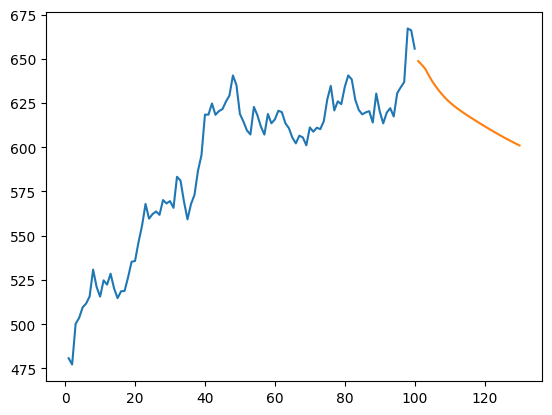

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[5816:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
# 30 Day Output